## **PCA:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("data/heart_disease_clean.csv")
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_female,sex_male,cp_asymptomatic,...,restecg_normal,restecg_showing probable,exang_no,exang_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0.0,0,False,True,False,...,False,True,True,False,True,False,False,True,False,False
1,67,160,286,108,1.5,3.0,1,False,True,True,...,False,True,False,True,False,True,False,False,True,False
2,67,120,229,129,2.6,2.0,1,False,True,True,...,False,True,False,True,False,True,False,False,False,True
3,37,130,250,187,3.5,0.0,0,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,41,130,204,172,1.4,0.0,0,True,False,False,...,False,True,True,False,False,False,True,False,True,False


In [ ]:
# standardization

X = df.drop("num", axis=1)
y = df["num"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

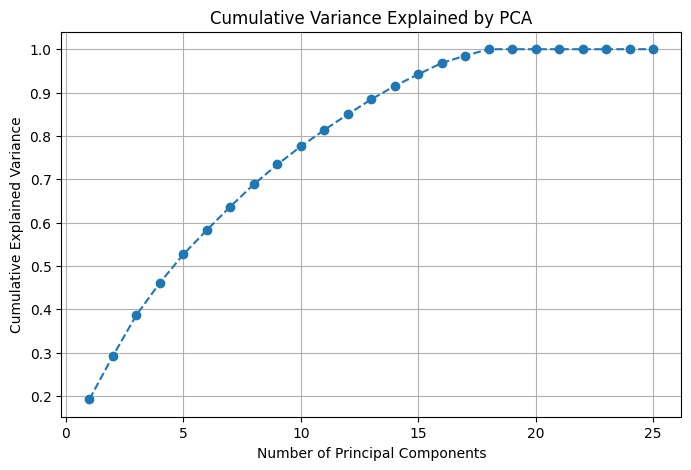

In [24]:
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.grid(True)
plt.show()

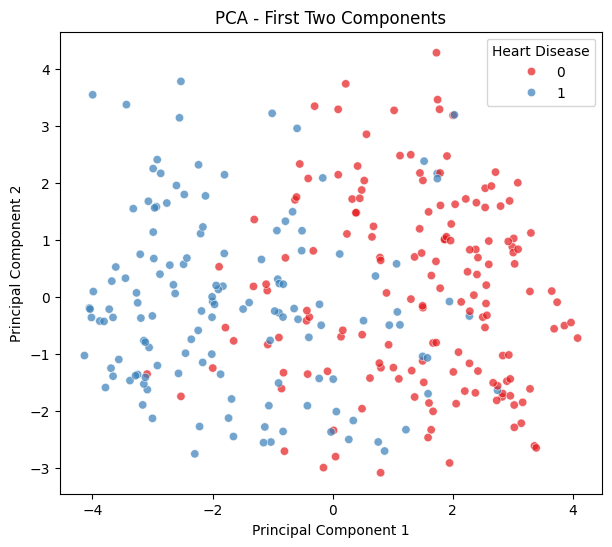

In [27]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.legend(title="Heart Disease")
plt.show()

In [26]:
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_df["num"] = y.values

X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,num
0,-1.305263,1.354322,-5.276631,-0.153224,-2.699270,3.901598,0.545967,-0.821688,0.573989,0.646012,...,0.439576,0.041090,2.787119e-15,1.231912e-15,-9.028617e-16,-1.624350e-18,7.633087e-16,1.432759e-16,-3.927780e-18,0
1,-3.319924,1.544783,0.653166,1.175338,0.648038,-0.203432,-0.495409,-0.884012,-0.572265,1.559621,...,-0.175712,-1.103631,-1.653773e-15,-5.999560e-16,7.624729e-16,-3.346913e-16,-1.318360e-15,4.485872e-16,-5.943893e-17,1
2,-4.050766,-0.197327,0.586837,0.937877,0.162710,-0.799226,-0.249812,0.004928,-0.314995,0.015148,...,0.509872,0.656430,2.241571e-16,4.273417e-17,4.381341e-16,-3.708885e-16,6.575514e-17,4.358043e-16,-3.279183e-16,1
3,1.498168,-1.123345,-0.564769,-1.086263,-2.397857,2.313828,1.348630,2.903583,-0.773164,-1.331311,...,0.200118,-0.098147,-8.211059e-16,-2.126513e-15,4.016504e-16,4.979760e-16,-9.852926e-16,-1.620355e-16,2.272029e-15,0
4,2.992041,0.874919,0.625367,1.678659,0.225671,1.180457,0.147655,-0.310779,0.720346,-1.619363,...,-0.993058,0.756856,6.776952e-16,-7.664894e-16,8.246128e-17,-3.763246e-16,4.024862e-16,3.653205e-16,-1.953757e-15,0
